## Positions of archaeological records in Vienna (AT)

Data source: https://www.data.gv.at/katalog/dataset/cda1b8eb-40ef-4229-9417-2ba29ea816dd#resources

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import folium
from folium import plugins
import scipy
from folium.plugins import MarkerCluster
import seaborn as sns

## Import data set

In [25]:
data = pd.read_csv('data/FUNDPUNKTEOGD.csv')

## Check data set

In [26]:
data.head()

FID  OBJECTID  \
0  FUNDPUNKTEOGD.4168567   4168567   
1  FUNDPUNKTEOGD.4168568   4168568   
2  FUNDPUNKTEOGD.4168569   4168569   
3  FUNDPUNKTEOGD.4168570   4168570   
4  FUNDPUNKTEOGD.4168571   4168571   

                                           SHAPE BEZ                  STRNAM  \
0  POINT (16.544947490889246 48.222152588066905)  22                  Eßling   
1    POINT (16.49679146205324 48.22667009446001)  22  Johann-Kutschera-Gasse   
2    POINT (16.39428385131498 48.31212573845404)  21            Senderstraße   
3   POINT (16.371198668305727 48.25860255833461)  20  Am Brigittenauer Sporn   
4    POINT (16.26137912267657 48.21509372593015)  14                Satzberg   

   HNR HNR_BIS       FUNDKATEGORIE  \
0  NaN     NaN  Einzel-, Streufund   
1  NaN     NaN  Einzel-, Streufund   
2   40     NaN     Siedlungsbefund   
3  NaN     NaN  Einzel-, Streufund   
4  NaN     NaN  Einzel-, Streufund   

                                          FUNDE  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4  Keramik, Steingeräte, Hüttenlehm, Reibplatte   

                          DATIERUNG  SE_ANNO_CAD_DATA  
0          Urgeschichte/Mittelalter               NaN  
1  Urgeschichte/Mittelalter/Neuzeit               NaN  
2        Urgeschichte/Paläolithikum               NaN  
3        Urgeschichte/Paläolithikum               NaN  
4                      Urgeschichte               NaN

In [27]:
data.isnull().sum()

FID                    0
OBJECTID               0
SHAPE                  0
BEZ                    8
STRNAM                10
HNR                 1004
HNR_BIS             2127
FUNDKATEGORIE          0
FUNDE                 47
DATIERUNG             12
SE_ANNO_CAD_DATA    2500
dtype: int64

In [28]:
data.dtypes

FID                  object
OBJECTID              int64
SHAPE                object
BEZ                  object
STRNAM               object
HNR                  object
HNR_BIS              object
FUNDKATEGORIE        object
FUNDE                object
DATIERUNG            object
SE_ANNO_CAD_DATA    float64
dtype: object

## Clean up data set

In [29]:
position_data = data.drop_duplicates(['OBJECTID'])
position_data.head()

FID  OBJECTID  \
0  FUNDPUNKTEOGD.4168567   4168567   
1  FUNDPUNKTEOGD.4168568   4168568   
2  FUNDPUNKTEOGD.4168569   4168569   
3  FUNDPUNKTEOGD.4168570   4168570   
4  FUNDPUNKTEOGD.4168571   4168571   

                                           SHAPE BEZ                  STRNAM  \
0  POINT (16.544947490889246 48.222152588066905)  22                  Eßling   
1    POINT (16.49679146205324 48.22667009446001)  22  Johann-Kutschera-Gasse   
2    POINT (16.39428385131498 48.31212573845404)  21            Senderstraße   
3   POINT (16.371198668305727 48.25860255833461)  20  Am Brigittenauer Sporn   
4    POINT (16.26137912267657 48.21509372593015)  14                Satzberg   

   HNR HNR_BIS       FUNDKATEGORIE  \
0  NaN     NaN  Einzel-, Streufund   
1  NaN     NaN  Einzel-, Streufund   
2   40     NaN     Siedlungsbefund   
3  NaN     NaN  Einzel-, Streufund   
4  NaN     NaN  Einzel-, Streufund   

                                          FUNDE  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4  Keramik, Steingeräte, Hüttenlehm, Reibplatte   

                          DATIERUNG  SE_ANNO_CAD_DATA  
0          Urgeschichte/Mittelalter               NaN  
1  Urgeschichte/Mittelalter/Neuzeit               NaN  
2        Urgeschichte/Paläolithikum               NaN  
3        Urgeschichte/Paläolithikum               NaN  
4                      Urgeschichte               NaN

## Extract coordinates of  records using RegEx

In [30]:
data['LATITUDE'] = data['SHAPE'].str.extract('(\s\d+.\d*)', expand=True)
data['LONGITUDE'] = data['SHAPE'].str.extract('(\d+.\d*)', expand=True)

## Create a Folium map of records

In [33]:
def mean_position(data):
    sum = 0.0
    for i in data:
        sum = sum + float(i)
    mean = sum / len(data)
    return mean

zoom = 12

record_map= folium.Map(location=[mean_position(data['LATITUDE']), mean_position(data['LONGITUDE'])], zoom_start=zoom, control_scale=True)
marker_cluster = MarkerCluster().add_to(record_map)

for i in range(len(data)):
        lat = data['LATITUDE'].iloc[i]
        long = data['LONGITUDE'].iloc[i]
        name = data['FUNDKATEGORIE'].iloc[i]
        radius=10
        folium.CircleMarker(location = [lat, long], popup=str(name),radius=radius,fill =True, color='blue',fill_color='blue').add_to(marker_cluster)
record_map.add_child(folium.LatLngPopup())
minimap = plugins.MiniMap()
record_map.add_child(minimap)
record_map

## Result

- The code navigates to the location with the highest number of records
- Zoom in and out
- Click on the blue circles to get more information about the records' category

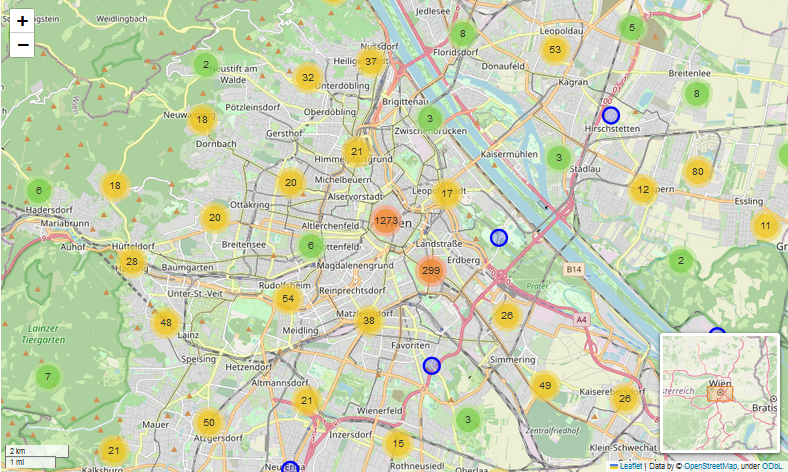

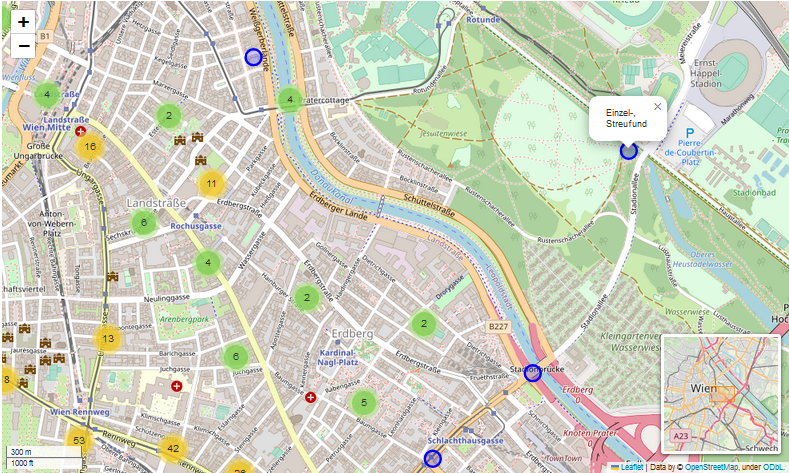